In [1]:
# Importação das bibliotecas Python
import os
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Importação das bibiotecas do Sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
# Importação das bibliotecas Graficas
import seaborn as sns
#import scikitplot as skplt
import matplotlib.pyplot as plt

# Exibe gráficos na página (inline)
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#pd.options.display.max_columns = 116
#pd.options.display.max_rows = 116

In [5]:
df = pd.read_csv('../datasets/dacoga/dsetN-Baiot_v1_Full.csv')

In [6]:
df.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Device_Name,Attack,Attack_subType,label
0,34.601760,398.908959,52550.382469,67.717384,403.302501,51712.306449,290.361681,371.306909,56847.712817,3664.475330,...,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,Provision_PT_838_Security_Camera,mirai,udp,Anomaly
1,166.897264,74.093675,2.239427,271.018503,74.076204,1.823122,802.782759,74.053501,1.405218,7073.265995,...,74.0,9.536743e-07,95.268043,9.094947e-13,0.0,0.0,Provision_PT_838_Security_Camera,gafgyt,combo,Anomaly
2,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,Provision_PT_838_Security_Camera,gafgyt,tcp,Anomaly
3,81.573509,361.922677,57800.777918,138.807560,321.869667,60673.771150,426.539988,314.707208,60910.274988,3941.072685,...,554.0,0.000000e+00,554.000000,0.000000e+00,0.0,0.0,Provision_PT_838_Security_Camera,mirai,udp,Anomaly
4,142.893002,65.017844,45.078160,202.254552,65.919080,47.843152,449.879100,67.102984,49.018986,3714.410039,...,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,Provision_PT_838_Security_Camera,mirai,syn,Anomaly


In [7]:
print("Linhas: ", df.shape[0])
print("Colunas: ", df.shape[1])

Linhas:  6451892
Colunas:  119


Attack
mirai     3057688
gafgyt    2838272
Normal     555932
Name: count, dtype: int64

Ataques representam 91.3834% do dataset.



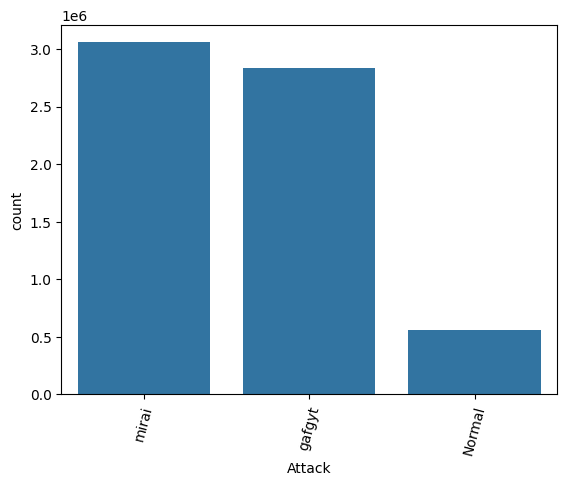

In [8]:
# Verificar o balanceamento das classes
print(df.Attack.value_counts())
print("\nAtaques representam {:.4f}% do dataset.\n".
      format((df[df.label == 'Anomaly'].shape[0] / df.shape[0]) * 100))

# Plotar gráfico de barras para as Classes
sns.countplot(x=df['Attack'])
plt.xticks(rotation=75)  # Inclinar os rótulos do eixo x em 75 graus
plt.show()  # Exibir o gráfico

In [9]:
df.drop('Device_Name', axis=1, inplace=True)
df.drop('Attack_subType', axis=1, inplace=True)

In [10]:
# Identificar e remover valores duplicados
df_sem_duplicatos = df.drop_duplicates(keep='first')

In [11]:
print("Linhas: ", df_sem_duplicatos.shape[0])
print("Colunas: ", df_sem_duplicatos.shape[1])

Linhas:  2480488
Colunas:  117


Attack
mirai     1637703
Normal     513497
gafgyt     329288
Name: count, dtype: int64

Ataques representam 79.2985% do dataset.



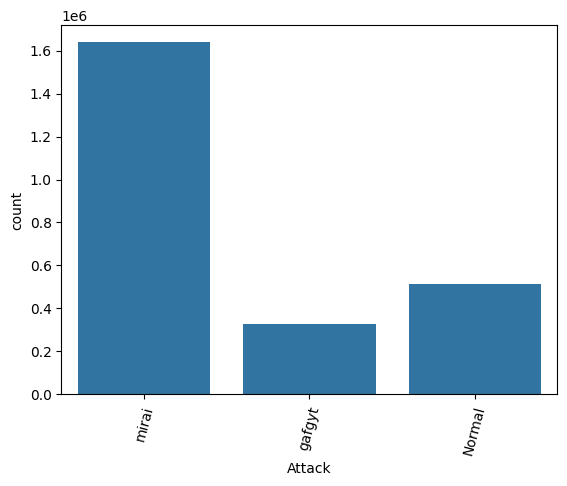

In [12]:
# Verificar o balanceamento das classes
print(df_sem_duplicatos.Attack.value_counts())
print("\nAtaques representam {:.4f}% do dataset.\n".
      format((df_sem_duplicatos[df_sem_duplicatos.label == 'Anomaly'].shape[0] / df_sem_duplicatos.shape[0]) * 100))

# Plotar gráfico de barras para as Classes
sns.countplot(x=df_sem_duplicatos['Attack'])
plt.xticks(rotation=75)  # Inclinar os rótulos do eixo x em 75 graus
plt.show()  # Exibir o gráfico

In [13]:
df_sem_duplicatos.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Attack,label
0,34.601760,398.908959,52550.382469,67.717384,403.302501,51712.306449,290.361681,371.306909,56847.712817,3664.475330,...,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,mirai,Anomaly
1,166.897264,74.093675,2.239427,271.018503,74.076204,1.823122,802.782759,74.053501,1.405218,7073.265995,...,0.0,1.678887,74.0,9.536743e-07,95.268043,9.094947e-13,0.0,0.0,gafgyt,Anomaly
2,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,gafgyt,Anomaly
3,81.573509,361.922677,57800.777918,138.807560,321.869667,60673.771150,426.539988,314.707208,60910.274988,3941.072685,...,0.0,1.000000,554.0,0.000000e+00,554.000000,0.000000e+00,0.0,0.0,mirai,Anomaly
4,142.893002,65.017844,45.078160,202.254552,65.919080,47.843152,449.879100,67.102984,49.018986,3714.410039,...,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,mirai,Anomaly


In [15]:
df_sem_duplicatos.drop('Attack', axis=1, inplace=True)

In [16]:
df_sem_duplicatos.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,34.601760,398.908959,52550.382469,67.717384,403.302501,51712.306449,290.361681,371.306909,56847.712817,3664.475330,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,Anomaly
1,166.897264,74.093675,2.239427,271.018503,74.076204,1.823122,802.782759,74.053501,1.405218,7073.265995,...,0.0,0.0,1.678887,74.0,9.536743e-07,95.268043,9.094947e-13,0.0,0.0,Anomaly
2,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,Anomaly
3,81.573509,361.922677,57800.777918,138.807560,321.869667,60673.771150,426.539988,314.707208,60910.274988,3941.072685,...,0.0,0.0,1.000000,554.0,0.000000e+00,554.000000,0.000000e+00,0.0,0.0,Anomaly
4,142.893002,65.017844,45.078160,202.254552,65.919080,47.843152,449.879100,67.102984,49.018986,3714.410039,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,Anomaly


In [18]:
# Transform the string labels to integer
le = LabelEncoder()
df_sem_duplicatos['label'] = le.fit_transform(df_sem_duplicatos['label'])
df_sem_duplicatos.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,34.601760,398.908959,52550.382469,67.717384,403.302501,51712.306449,290.361681,371.306909,56847.712817,3664.475330,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,0
1,166.897264,74.093675,2.239427,271.018503,74.076204,1.823122,802.782759,74.053501,1.405218,7073.265995,...,0.0,0.0,1.678887,74.0,9.536743e-07,95.268043,9.094947e-13,0.0,0.0,0
2,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,0
3,81.573509,361.922677,57800.777918,138.807560,321.869667,60673.771150,426.539988,314.707208,60910.274988,3941.072685,...,0.0,0.0,1.000000,554.0,0.000000e+00,554.000000,0.000000e+00,0.0,0.0,0
4,142.893002,65.017844,45.078160,202.254552,65.919080,47.843152,449.879100,67.102984,49.018986,3714.410039,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,0


In [19]:
df_final = df_sem_duplicatos.rename(columns={'MI_dir_L0.1_weight': 'MI_dir_L0_1_weight'}) \
        .rename(columns={'MI_dir_L0.1_mean': 'MI_dir_L0_1_mean'}) \
        .rename(columns={'MI_dir_L0.1_variance': 'MI_dir_L0_1_variance'}) \
        .rename(columns={'MI_dir_L0.01_weight': 'MI_dir_L0_01_weight'}) \
        .rename(columns={'MI_dir_L0.01_mean': 'MI_dir_L0_01_mean'}) \
        .rename(columns={'MI_dir_L0.01_variance': 'MI_dir_L0_01_variance'}) \
        .rename(columns={'H_L0.1_weight': 'H_L0_1_weight'}) \
        .rename(columns={'H_L0.1_mean': 'H_L0_1_mean'}) \
        .rename(columns={'H_L0.1_variance': 'H_L0_1_variance'}) \
        .rename(columns={'H_L0.01_weight': 'H_L0_01_weight'}) \
        .rename(columns={'H_L0.01_mean': 'H_L0_01_mean'}) \
        .rename(columns={'H_L0.01_variance': 'H_L0_01_variance'}) \
        .rename(columns={'HH_L0.1_weight': 'HH_L0.1_weight'}) \
        .rename(columns={'HH_L0.1_mean': 'HH_L0_1_mean'}) \
        .rename(columns={'HH_L0.1_std': 'HH_L0_1_std'}) \
        .rename(columns={'HH_L0.1_magnitude': 'HH_L0_1_magnitude'}) \
        .rename(columns={'HH_L0.1_radius': 'HH_L0_1_radius'}) \
        .rename(columns={'HH_L0.1_covariance': 'HH_L0_1_covariance'}) \
        .rename(columns={'HH_L0.1_pcc': 'HH_L0_1_pcc'}) \
        .rename(columns={'HH_L0.01_weight': 'HH_L0_01_weight'}) \
        .rename(columns={'HH_L0.01_mean': 'HH_L0_01_mean'}) \
        .rename(columns={'HH_L0.01_std': 'HH_L0_01_std'}) \
        .rename(columns={'HH_L0.01_magnitude': 'HH_L0_01_magnitude'}) \
        .rename(columns={'HH_L0.01_radius': 'HH_L0_01_radius'}) \
        .rename(columns={'HH_L0.01_covariance': 'HH_L0_01_covariance'}) \
        .rename(columns={'HH_L0.01_pcc': 'HH_L0_01_pcc'}) \
        .rename(columns={'HH_jit_L0.1_weight': 'HH_jit_L0_1_weight'}) \
        .rename(columns={'HH_jit_L0.1_mean': 'HH_jit_L0_1_mean'}) \
        .rename(columns={'HH_jit_L0.1_variance': 'HH_jit_L0_1_variance'}) \
        .rename(columns={'HH_jit_L0.01_weight': 'HH_jit_L0_01_weight'}) \
        .rename(columns={'HH_jit_L0.01_mean': 'HH_jit_L0_01_mean'}) \
        .rename(columns={'HH_jit_L0.01_variance': 'HH_jit_L0_01_variance'}) \
        .rename(columns={'HpHp_L0.1_weight': 'HpHp_L0_1_weight'}) \
        .rename(columns={'HpHp_L0.1_mean': 'HpHp_L0_1_mean'}) \
        .rename(columns={'HpHp_L0.1_std': 'HpHp_L0_1_std'}) \
        .rename(columns={'HpHp_L0.1_magnitude': 'HpHp_L0_1_magnitude'}) \
        .rename(columns={'HpHp_L0.1_radius': 'HpHp_L0_1_radius'}) \
        .rename(columns={'HpHp_L0.1_covariance': 'HpHp_L0_1_covariance'}) \
        .rename(columns={'HpHp_L0.1_pcc': 'HpHp_L0_1_pcc'}) \
        .rename(columns={'HpHp_L0.01_weight': 'HpHp_L0_01_weight'}) \
        .rename(columns={'HpHp_L0.01_mean': 'HpHp_L0_01_mean'}) \
        .rename(columns={'HpHp_L0.01_std': 'HpHp_L0_01_std'}) \
        .rename(columns={'HpHp_L0.01_magnitude': 'HpHp_L0_01_magnitude'}) \
        .rename(columns={'HpHp_L0.01_radius': 'HpHp_L0_01_radius'}) \
        .rename(columns={'HpHp_L0.01_covariance': 'HpHp_L0_01_covariance'}) \
        .rename(columns={'HpHp_L0.01_pcc': 'HpHp_L0_01_pcc'})

In [20]:
df_final.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0_1_weight,...,HpHp_L0_1_covariance,HpHp_L0_1_pcc,HpHp_L0_01_weight,HpHp_L0_01_mean,HpHp_L0_01_std,HpHp_L0_01_magnitude,HpHp_L0_01_radius,HpHp_L0_01_covariance,HpHp_L0_01_pcc,label
0,34.601760,398.908959,52550.382469,67.717384,403.302501,51712.306449,290.361681,371.306909,56847.712817,3664.475330,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,0
1,166.897264,74.093675,2.239427,271.018503,74.076204,1.823122,802.782759,74.053501,1.405218,7073.265995,...,0.0,0.0,1.678887,74.0,9.536743e-07,95.268043,9.094947e-13,0.0,0.0,0
2,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,0
3,81.573509,361.922677,57800.777918,138.807560,321.869667,60673.771150,426.539988,314.707208,60910.274988,3941.072685,...,0.0,0.0,1.000000,554.0,0.000000e+00,554.000000,0.000000e+00,0.0,0.0,0
4,142.893002,65.017844,45.078160,202.254552,65.919080,47.843152,449.879100,67.102984,49.018986,3714.410039,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,0


Label
Ataques 0 1966991
Normal 1 513497

Ataques representam 79.2985% do dataset.



<Axes: xlabel='label', ylabel='count'>

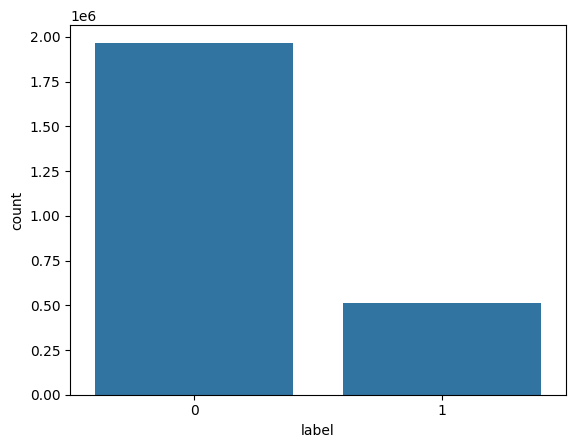

In [21]:
# Verificar o balanceamento das classes
#print(df.label.value_counts())
print('Label')
print('Ataques', df_final.label.value_counts().index.tolist()[0], df_final.label.value_counts()[0])
print('Normal', df_final.label.value_counts().index.tolist()[1], df_final.label.value_counts()[1])

print("\nAtaques representam {:.4f}% do dataset.\n". 
      format((df_final[df_final.label == 0].shape[0] / df_final.shape[0]) * 100))

# plotar gráfico de barras para as Classes
sns.countplot(x=df_final['label'])

In [22]:
diretorio = '../datasets/dacoga/'
arquivo_saida = 'dsetN-Baiot_v2_label_NoDuplicates.csv'

caminho_completo_saida = os.path.join(diretorio, arquivo_saida)
df_final.to_csv(caminho_completo_saida, index=False)